## Predicting Salary using Linear Regression

### Objective
* We have to predict the salary of an employee given how many years of experience they have.

### Dataset
* Salary_Data.csv has 2 columns — “Years of Experience” and “Salary” for 30 employees in a company

### Approach
* So in this example, we will train a Linear Regression model to learn the correlation between the number of years of experience of each employee and their respective salary. 
* Once the model is trained, we will be able to do some sample predictions.

In [1]:
# Import Libraries.

import mlpack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
# Uncomment below line to enable dark background style sheet.
# plt.style.use('dark_background')

In [3]:
# Load the salary dataset.
data = pd.read_csv("https://datasets.mlpack.org/Salary_Data.csv")

In [4]:
# Display the first 5 samples from dataframe.
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Generates basic statistical summary of the dataframe.
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Generates a concise summary of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Exploratory Data Analysis

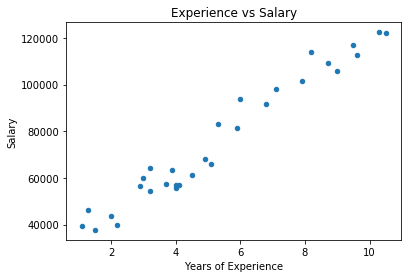

In [8]:
# Scatter plot of Experience vs Salary.
data.plot(x="YearsExperience", y="Salary",
          kind="scatter", title="Experience vs Salary")
plt.xlabel("Years of Experience")
plt.show()

### Train Test Split
The dataset has to be split into a training set and a test set.
This can be done using the `preprocess_split()` api from mlpack.
Here the dataset has 30 observations and the `testRatio` is taken as 40% of the total observations.
This indicates the test set should have 40% * 30 = 12 observations and training test should have 18 observations respectively.

In [9]:
# Split data into features (X) and targets (y).

targets = data.Salary
features = data.drop("Salary", axis=1)

In [10]:
# Split the dataset using mlpack's preprocess_split method.
splitData = mlpack.preprocess_split(input_=features, input_labels=targets, test_ratio=0.4, seed=101)

### Training the linear model

Regression analysis is the most widely used method of prediction. Linear regression is used when the dataset has a linear correlation and as the name suggests, simple linear regression has one independent variable (predictor) and one dependent variable(response).

The simple linear regression equation is represented as y = a+bx where x is the explanatory variable, y is the dependent variable, b is coefficient and a is the intercept

To perform linear regression we'll be using `LinearRegression()` api from mlpack.

In [11]:
# Create and train Linear Regression model.
model = mlpack.LinearRegression(lambda_=0.5, verbose=True)

In [12]:
output_model = model.fit(training=splitData["training"], training_responses=splitData["training_labels"])

### Making Predictions on Test set

In [13]:
# Predict the values of the test data.
output_predictions = model.predict(test=splitData['test'])

In [14]:
yPreds = output_predictions.reshape(-1, 1).squeeze()

### Model Evaluation
Test data is visualized with `splitData["test"]` and `yPreds`, the coral points indicates the data points and the blue line indicates the regression line or best fit line.

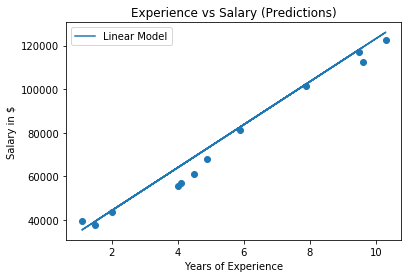

In [22]:
# Plot the linear model.
plt.scatter(splitData["test"], splitData["test_labels"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary in $")
plt.title("Experience vs Salary (Predictions)")
plt.plot(splitData["test"], yPreds)
plt.legend(["Linear Model"])
plt.show()

## Evaluation Metrics for Regression model

In the Previous cell we have visualized our model performance by plotting the best fit line. Now we will use various evaluation metrics to understand how well our model has performed.

* Mean Absolute Error (MAE) is the sum of absolute differences between actual and predicted values, without considering the direction.
$$ MAE = \frac{\sum_{i=1}^n\lvert y_{i} - \hat{y_{i}}\rvert} {n} $$
* Mean Squared Error (MSE) is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset, a lower value is better
$$ MSE = \frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2 $$
* Root Mean Squared Error (RMSE), Square root of MSE yields root mean square error (RMSE) it indicates the spread of the residual errors. It is always positive, and a lower value indicates better performance.
$$ RMSE = \sqrt{\frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2} $$

In [23]:
# Utility functions for evaulation metrics.

def mae(y_true, y_preds):
    return np.mean(np.abs(y_preds - y_true))

def mse(y_true, y_preds):
    return np.mean(np.power(y_preds - y_true, 2))

In [39]:
print("---- Evaluation Metrics ----")
print(f"Mean Absolute Error: {mae(splitData['test_labels'], yPreds):.2f}")
print(f"Mean Squared Error: {mse(splitData['test_labels'], yPreds):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse(splitData['test_labels'], yPreds)):.2f}")

---- Evaluation Metrics ----
Mean Absoulte Error: 4136.06
Mean Squared Error: 24922668.74
Root Mean Squared Error: 4992.26


From the above metrics, we can notice that our model MAE is ~4K, which is relatively small compared to our average salary of $76003, from this we can conclude our model is a reasonably good fit.